In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on mon Jul 27 08:23:27 2020

@author: zaigham
"""


#Import the libraries
import math
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("drive/My Drive/stock-forecasting/tsl_data.csv") 
print(df.head())
print(df.shape)

                  Date    Open    High     Low   Close  Volume
0  2015-01-02 19:30:00  222.61  222.99  222.44  222.44     960
1  2015-01-02 19:35:00  222.00  222.39  221.42  222.06    1786
2  2015-01-02 19:40:00  221.83  221.85  221.19  221.49    1650
3  2015-01-02 19:45:00  221.33  221.68  219.59  220.06    2289
4  2015-01-02 19:50:00  220.05  220.05  218.33  218.33    1500
(100699, 6)


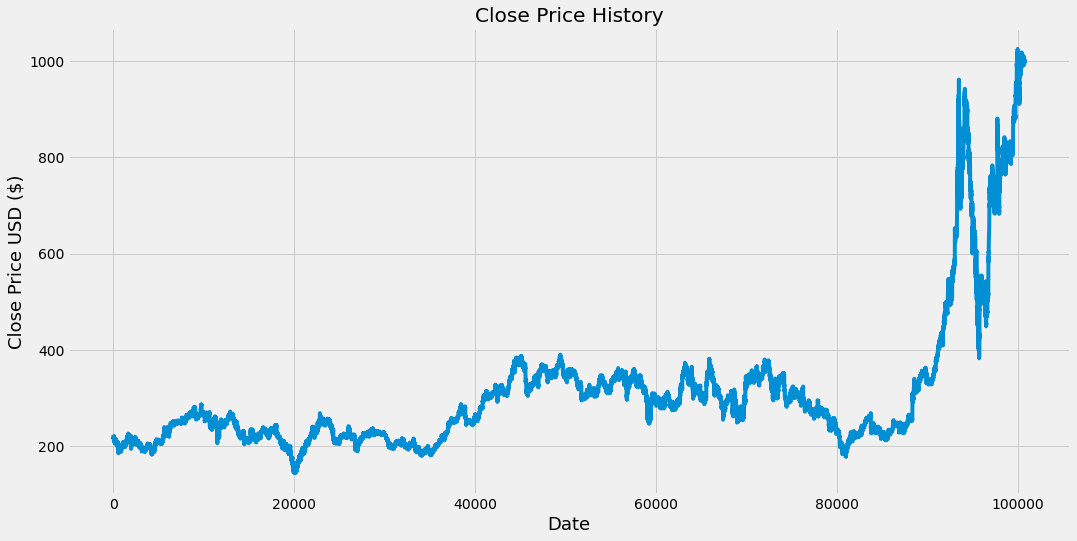

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

In [6]:
#Converting the dataframe to a numpy array
dataset = data.values

In [68]:
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.95)

In [69]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [70]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


In [71]:

#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [72]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [73]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [74]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [75]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [76]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [77]:

#Compile the model
model.compile(optimizer='adam', loss='mae')

In [78]:
#Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=30)

Epoch 1/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0034
Epoch 2/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0021
Epoch 3/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0018
Epoch 4/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0016
Epoch 5/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0015
Epoch 6/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0014
Epoch 7/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0014
Epoch 8/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0013
Epoch 9/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0013
Epoch 10/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0013
Epoch 11/30
1494/1494 [==============================] - 11s 7ms/step - loss: 0.0012
Epoch 12/30
1494/1494 [==============================] - 11s 7ms/step - lo

In [79]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [80]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

4.249520982956941


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


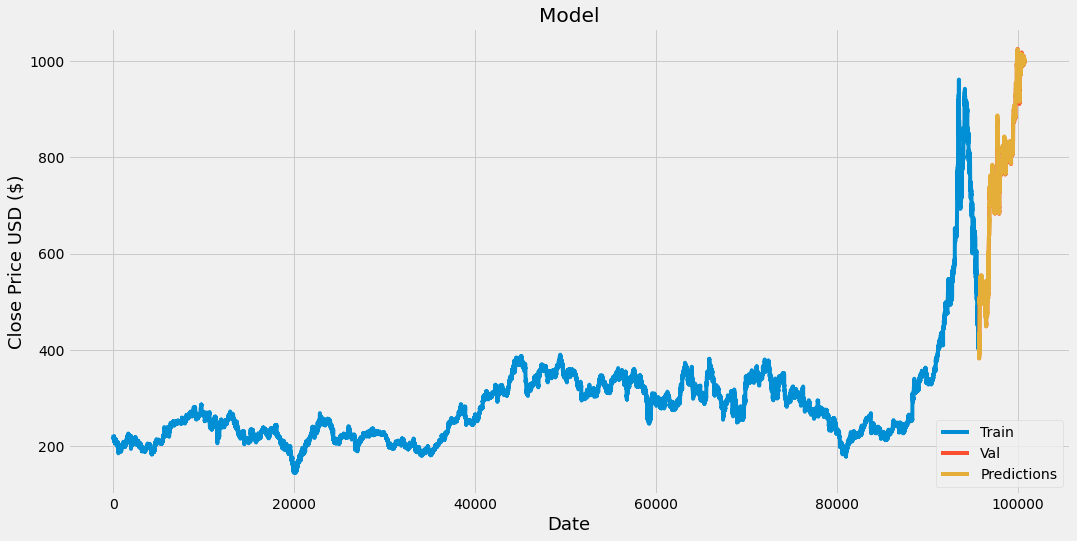

In [81]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [82]:
#Show the valid and predicted prices
print(valid)

           Close  Predictions
95665    431.125   429.060120
95666    432.830   430.833984
95667    427.120   432.370331
95668    427.660   426.774719
95669    424.580   427.416870
...          ...          ...
100694  1000.030  1000.384277
100695  1001.300  1000.248596
100696  1001.730  1001.321106
100697   999.300  1001.782837
100698   995.540   999.915161

[5034 rows x 2 columns]


In [85]:
model.save('model.h5')